# Hello World Agent
Our first LangGraph graph!

In [2]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [42]:
class AgentState(TypedDict):
    message: str

def greeting_node(state: AgentState) -> AgentState:
    """Simple node that adds a greeting message to the state"""

    state["message"] = f"Hey {state["message"]}, how is your day going?"
    return state

In [43]:
graph = StateGraph(AgentState)

graph.add_node("greeter", greeting_node)

graph.set_entry_point("greeter")
graph.set_finish_point("greeter")

app = graph.compile()

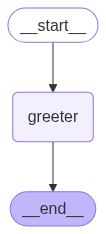

In [6]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [44]:
result = app.invoke({"message": "Bob"})

In [45]:
result["message"]

'Hey Bob, how is your day going?'

# Exercise for Graph I
* Your task: Create a **Personalized Compliment Agent** using Langgraph!

**Input**: {"name": "Bob"}

**Output** "Bob, you're doing an amazing job learning LangGraph!"

*Hint*: You have to concatenate the state, not replace it!

In [9]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

class ExerciseOneGraphState(TypedDict):
    name: str

In [10]:
def personalized_compliment(state: ExerciseOneGraphState) -> ExerciseOneGraphState:
    """Creates a personalized compliment agent."""

    state["name"] = f"Hey {state["name"]}, you're doing an amazing job learning Langgraph!"
    return state

In [11]:
graph = StateGraph(ExerciseOneGraphState)

graph.add_node("compliment", personalized_compliment)

graph.set_entry_point("compliment")
graph.set_finish_point("compliment")

app = graph.compile()

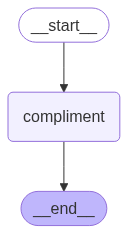

In [4]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [12]:
result = app.invoke({"name": "Roberto"})
# # result = app.invoke({"name": "Bob"})
# result = app.invoke({"name": "Bob"})

In [14]:
result["name"]

"Hey Roberto, you're doing an amazing job learning Langgraph!"

# Example 2

In [16]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [17]:
class AgentState(TypedDict):
    values: List[int]
    name: str
    result: str

In [28]:
def process_values(state: AgentState) -> AgentState:
    """This function handles multiple different inputs."""

    print(state)
    state["result"] = f"Hi there {state["name"]}! Your sum = {sum(state["values"])}"
    print(state)
    return state

In [29]:
graph = StateGraph(AgentState)

graph.add_node("processor", process_values)
graph.set_entry_point("processor")
graph.set_finish_point("processor")

app = graph.compile()

In [30]:
answer = app.invoke({"values": [1, 2, 3, 4],
                     "name": "Steve"}
                     )

print(answer)




{'values': [1, 2, 3, 4], 'name': 'Steve'}
{'values': [1, 2, 3, 4], 'name': 'Steve', 'result': 'Hi there Steve! Your sum = 10'}
{'values': [1, 2, 3, 4], 'name': 'Steve', 'result': 'Hi there Steve! Your sum = 10'}


# Exercise 2

**Your task**: 

Create **Graph** where you pass in a single list of integers along with a name and an operation. If the operation is a "+", you **add** the elements and if it is a "*", you **multiply** the elements, **all within the same node**.

**Input**: {"name": "Jack Sparrow", "values": [1, 2, 3, 4], "operation": "*"}
**Output**: "Hi Jack Sparrow, your answer is: 24"

*Hint*: You need an if-statement in your node!.

In [9]:
from pydantic import BaseModel, Field
from typing import List, Literal
from langgraph.graph import StateGraph

class ExerciseTwoState(BaseModel):
    name: str = Field(description="The name of the person")
    values: List[int] = Field(description="List of values for the operation")
    operation: Literal["+", "*"] = Field(description="Whether is a sum or a multiplication.")
    result: str = Field(description="The final result/output.")

In [10]:
import math

def process_exercise_two(state: ExerciseTwoState) -> ExerciseTwoState:
    """Process the name, values and the operation type."""

    if  state.operation == "+":
        state.result = f"Hi {state.name}, your answer is {sum(state.values)}."
        return state
    elif state.operation == "*":
        state.result = f"Hi {state.name}, your answer is {math.prod(state.values)}."
        return state

In [11]:
graph = StateGraph(ExerciseTwoState)

graph.add_node("main", process_exercise_two)

graph.set_entry_point("main")
graph.set_finish_point("main")

app = graph.compile()

In [17]:
res2 = app.invoke({
    "name": "Roberto",
    "values": [2, 4, 6 ,8],
    "operation": "*",
    "result": ""
    })

print(ExerciseTwoState(**res2))

name='Roberto' values=[2, 4, 6, 8] operation='*' result='Hi Roberto, your answer is 384.'


# Graph 3

In [2]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [3]:
class AgentState(TypedDict):
    name: str
    age: str
    final: str

In [9]:
def first_node(state: AgentState) -> AgentState:
    """This is the first node of our sequence"""

    state["final"] = f"Hi {state["name"]}! "
    return state

def second_node(state: AgentState) -> AgentState:
    """This is the second node of our sequence"""

    state["final"] = state["final"] + f"You are {state["age"]} years old!"
    return state

In [10]:
graph = StateGraph(AgentState)

graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)

graph.set_entry_point("first_node")
graph.add_edge("first_node", "second_node")
graph.set_finish_point("second_node")

app = graph.compile()

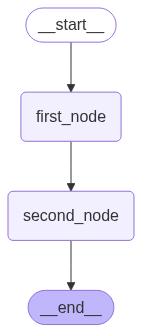

In [11]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [12]:
result = app.invoke({
    "name": "Charlie",
    "age": 20
})
print(result)

{'name': 'Charlie', 'age': 20, 'final': 'Hi Charlie! You are 20 years old!'}


# Exercise for Graph III


In [2]:
from langgraph.graph import StateGraph
from typing import TypedDict, List

In [3]:
class ThirdAgentState(TypedDict):
    name: str
    age: int
    skills: List[str]
    final_result: str

In [4]:
def first_node(state: ThirdAgentState) -> ThirdAgentState:
    """This node will greet the user."""
    state["final_result"] = f"{state["name"]}, welcome to the system! "
    return state

def second_node(state: ThirdAgentState) -> ThirdAgentState:
    """This node will describe the user's age."""
    state["final_result"] = state["final_result"] + f"You are {state["age"]} years old! "
    return state

def third_node(state: ThirdAgentState) -> ThirdAgentState:
    """This node will list the user's skills in a formatted string."""
    state["final_result"] = state["final_result"] + f"You have skills in: {", ".join(state["skills"])}."
    return state

In [5]:
graph = StateGraph(ThirdAgentState)

graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)
graph.add_node("third_node", third_node)

graph.set_entry_point("first_node")
graph.add_edge("first_node", "second_node")
graph.add_edge("second_node", "third_node")
graph.set_finish_point("third_node")

app = graph.compile()

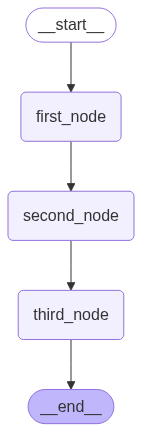

In [6]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
res = app.invoke({
    "name": "Rob",
    "age": 33,
    "skills": ["python", "LLMs"],
    "final_result": ""
})

print(res["final_result"])

Rob, welcome to the system! You are 33 years old! You have skills in: python, LLMs.


# Graph 4 - Conditional Graph

In [8]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [9]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    finalNumber: int

In [10]:
def adder(state: AgentState) -> AgentState:
    """This node adds the 2 numbers."""

    state["finalNumber"] = state["number1"] + state["number2"]
    return state

def substractor(state: AgentState) -> AgentState:
    """This node substracts the 2 numbers."""

    state["finalNumber"] = state["number1"] - state["number2"]
    return state

def decide_next_node(state: AgentState) -> AgentState:
    """This node will select the next node of the graph."""
    if state["operation"] == "+":
        return "addition_operation"
    elif state["operation"] == "-":
        return "substraction_operation"


In [12]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("substract_node", substractor)
graph.add_node("router", lambda state:state)

graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        "addition_operattion": "add_node",
        "substraction_operation": "substract_node"
    }
)

graph.add_edge("add_node", END)
graph.add_edge("substract_node", END)

app = graph.compile()

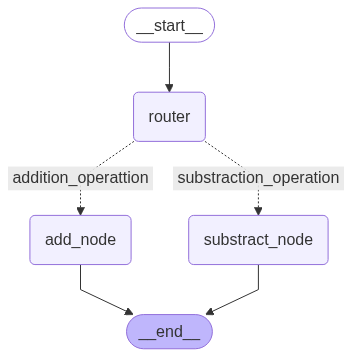

In [13]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [14]:
res = app.invoke({
    "number1": 10,
    "operation": "-",
    "number2": 3
})
print(res)

{'number1': 10, 'operation': '-', 'number2': 3, 'finalNumber': 7}


# Graph IV

In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, List, Literal

In [2]:
class AgentState(TypedDict):
    number1: int
    number2: int
    operation: Literal["+", "-"]
    finalNumber: int
    number3: int
    number4: int
    operation2: Literal["+", "-"]
    finalNumber2: int

In [18]:
def adder(state:AgentState) -> AgentState:
    """This node adds the 2 numbers"""
    print("adder")
    state["finalNumber"] = state["number1"] + state["number2"]
    return state

def subtractor(state:AgentState) -> AgentState:
    """This node subtracts the 2 numbers"""
    print("subtractor")
    state["finalNumber"] = state["number1"] - state["number2"]
    return state

def decide_next_node(state:AgentState) -> AgentState:
    """This node will select the next phase"""
    if state["operation"] == "+":
        return "addition_operation"
    
    elif state["operation"] == "-":
        print("SUB 1")
        return "subtraction_operation"   


def adder2(state:AgentState) -> AgentState:
    """This node adds the 2 numbers"""
    print("adder1")
    state["finalNumber2"] = state["number3"] + state["number4"]
    print(state["finalNumber2"])

    return state

def subtractor2(state:AgentState) -> AgentState:
    """This node subtracts the 2 numbers"""
    print("subtractor1")
    state["finalNumber2"] = state["number3"] - state["number4"]
    print(state["finalNumber2"])
    return state

def decide_next_node1(state:AgentState) -> AgentState:
    """This node will select the next phase"""
    if state["operation2"] == "+":
        print("ADD1")
        return "addition_operation2"
    
    elif state["operation2"] == "-":
        return "subtraction_operation2"   

In [19]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", substractor)
graph.add_node("router", lambda state:state) 

graph.add_node("add_node2", adder2)
graph.add_node("subtract_node2", substractor2)
graph.add_node("router2", lambda state:state) 


graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router", 
    decide_next_node,
    {
        # Edge: Node format
        "addition_operation": "add_node",
        "subtraction_operation": "subtract_node"
    }
)


graph.add_edge("add_node", "router2")
graph.add_edge("subtract_node", "router2")

graph.add_conditional_edges(
    "router2", 
    decide_next_node1,
    {
        # Edge: Node format
        "addition_operation2": "add_node2",
        "subtraction_operation2": "subtract_node2"
    }
)


graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)

app = graph.compile()

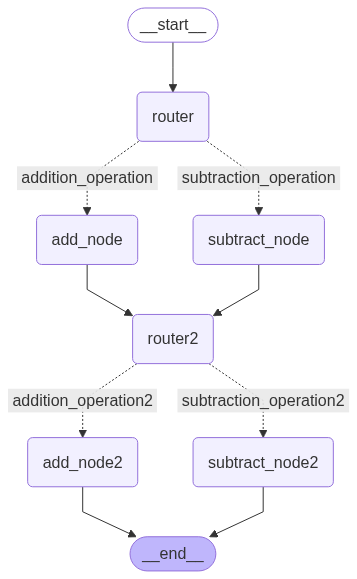

In [20]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [21]:
initial_state = AgentState(number1 = 10, operation="-", number2 = 5, number3 = 7, number4=2, operation2="+", finalNumber= 0, finalNumber2 = 0)

In [22]:
print(app.invoke(initial_state))

SUB 1
ADD1
adder1
9
{'number1': 10, 'number2': 5, 'operation': '-', 'finalNumber': 5, 'number3': 7, 'number4': 2, 'operation2': '+', 'finalNumber2': 9}


# Graph V

In [ ]:
from langgraph.graph import StateGraph, END
import random
from typing import Dict, List, TypedDict